In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df0 = df[df.target == 0]
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df1 = df[df.target == 1]
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [8]:
df2 = df[df.target == 2]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(['target', 'flower_name'], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=10)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [58]:
knn.score(X_test, y_test)

0.9

In [59]:
from sklearn.metrics import confusion_matrix

y_predicted = knn.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  8]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

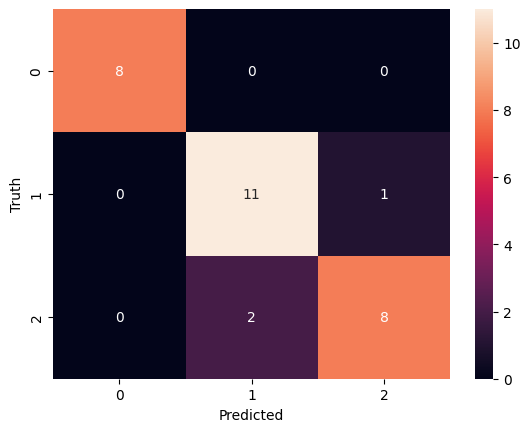

In [62]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      0.92      0.88        12
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [65]:
from sklearn.datasets import load_digits
digits = load_digits()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [72]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [0.1,0.5,0.75,1,5,10,20],
            'kernel': ['rbf', 'linear']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [0.1,0.5,0.75,1,5,10,20]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'gaussiannb': {
        'model': GaussianNB(),
        'params': {
        }
    },
    'multinomialnb': {
        'model': MultinomialNB(),
        'params': {
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,5,10,20]
        }
    }
}

In [73]:
scores= []

for model_name, mp in model_params.items():
   clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
   clf.fit(digits.data, digits.target)
   scores.append(
      {
         'model': model_name,
         'best_score': clf.best_score_,
         'best_params': clf.best_params_
      }
   ) 

In [74]:
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 0.1, 'kernel': 'linear'}"
1,logistic_regression,0.924342,{'C': 0.1}
2,decision_tree,0.816948,{'criterion': 'log_loss'}
3,random_forest,0.929912,{'n_estimators': 50}
4,gaussiannb,0.806928,{}
5,multinomialnb,0.870350,{}
6,knn,0.966622,{'n_neighbors': 3}


In [75]:
clf = KNeighborsClassifier(n_neighbors=3)

In [77]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
y_predicted = clf.predict(X_test)

Text(50.722222222222214, 0.5, 'Truth')

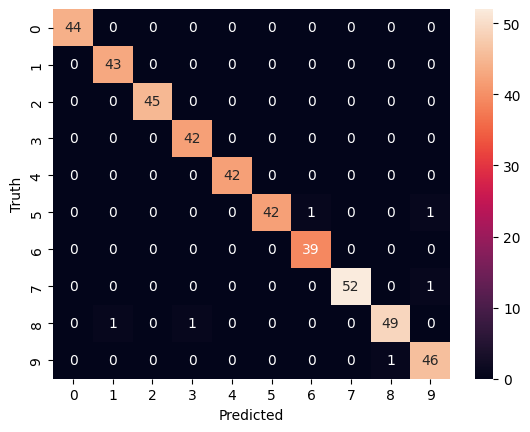

In [79]:
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm ,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        45
           3       0.98      1.00      0.99        42
           4       1.00      1.00      1.00        42
           5       1.00      0.95      0.98        44
           6       0.97      1.00      0.99        39
           7       1.00      0.98      0.99        53
           8       0.98      0.96      0.97        51
           9       0.96      0.98      0.97        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

